In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib','inline')

#### call the data

In [2]:
cov_death=pd.read_csv('COVID_19_BDD.csv',encoding="unicode_escape")
cov_death

,continent,date,location,new_cases,new_deaths,total_tests,new_vaccinations,hosp_patients,total_cases,total_deaths,median_age,new_cases_smoothed,new_deaths_smoothed,aged_65_older,aged_70_older,population,female_smokers,male_smokers
0,Asia,2020-01-03,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,NaN,18.6,NaN,NaN,2.581,1.337,41128772.0,NaN,NaN
1,Asia,2020-01-04,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,NaN,18.6,NaN,NaN,2.581,1.337,41128772.0,NaN,NaN
2,Asia,2020-01-05,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,NaN,18.6,NaN,NaN,2.581,1.337,41128772.0,NaN,NaN
3,Asia,2020-01-06,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,NaN,18.6,NaN,NaN,2.581,1.337,41128772.0,NaN,NaN
4,Asia,2020-01-07,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,NaN,18.6,NaN,NaN,2.581,1.337,41128772.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353801,Africa,2023-10-29,Zimbabwe,0.0,0.0,NaN,NaN,NaN,265821.0,5720.0,19.6,0.0,0.0,2.822,1.882,16320539.0,1.6,30.7
353802,Africa,2023-10-30,Zimbabwe,0.0,0.0,NaN,NaN,NaN,265821.0,5720.0,19.6,0.0,0.0,2.822,1.882,16320539.0,1.6,30.7
353803,Africa,2023-10-31,Zimbabwe,0.0,0.0,NaN,NaN,NaN,265821.0,5720.0,19.6,0.0,0.0,2.822,1.882,16320539.0,1.6,30.7
353804,Africa,2023-11-01,Zimbabwe,0.0,0.0,NaN,NaN,NaN,265821.0,5720.0,19.6,0.0,0.0,2.822,1.882,16320539.0,1.6,30.7


#### number the columns and lingen

In [3]:
cov_death.shape


(353806, 18)

#### info of the data

In [4]:
cov_death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353806 entries, 0 to 353805
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   continent            336963 non-null  object 
 1   date                 353806 non-null  object 
 2   location             353806 non-null  object 
 3   new_cases            344151 non-null  float64
 4   new_deaths           344196 non-null  float64
 5   total_tests          79387 non-null   float64
 6   new_vaccinations     65650 non-null   float64
 7   hosp_patients        39044 non-null   float64
 8   total_cases          315748 non-null  float64
 9   total_deaths         294071 non-null  float64
 10  median_age           279327 non-null  float64
 11  new_cases_smoothed   342892 non-null  float64
 12  new_deaths_smoothed  342966 non-null  float64
 13  aged_65_older        269578 non-null  float64
 14  aged_70_older        276527 non-null  float64
 15  population       

#### Dividing date into days, months and years

In [5]:
cov_death['date'] = pd.to_datetime(cov_death['date'])


cov_death['year'] = cov_death['date'].dt.year
cov_death['month'] = cov_death['date'].dt.month
cov_death['day'] = cov_death['date'].dt.day

#### nombre of the case null

In [6]:
cov_death.isnull().sum()

continent               16843
date                        0
location                    0
new_cases                9655
new_deaths               9610
total_tests            274419
new_vaccinations       288156
hosp_patients          314762
total_cases             38058
total_deaths            59735
median_age              74479
new_cases_smoothed      10914
new_deaths_smoothed     10840
aged_65_older           84228
aged_70_older           77279
population                  0
female_smokers         147935
male_smokers           150736
year                        0
month                       0
day                         0
dtype: int64

#### filling the case null of 0

In [7]:
cov_death['total_deaths'] =cov_death ['total_deaths'].fillna(0)

In [8]:
cov_death.isnull().sum()


continent               16843
date                        0
location                    0
new_cases                9655
new_deaths               9610
total_tests            274419
new_vaccinations       288156
hosp_patients          314762
total_cases             38058
total_deaths                0
median_age              74479
new_cases_smoothed      10914
new_deaths_smoothed     10840
aged_65_older           84228
aged_70_older           77279
population                  0
female_smokers         147935
male_smokers           150736
year                        0
month                       0
day                         0
dtype: int64

In [9]:
#

cov_death.duplicated().sum()

#### nombre of the columne and lingne

In [10]:
cov_death.shape

(353806, 21)

In [11]:
cov_death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353806 entries, 0 to 353805
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   continent            336963 non-null  object        
 1   date                 353806 non-null  datetime64[ns]
 2   location             353806 non-null  object        
 3   new_cases            344151 non-null  float64       
 4   new_deaths           344196 non-null  float64       
 5   total_tests          79387 non-null   float64       
 6   new_vaccinations     65650 non-null   float64       
 7   hosp_patients        39044 non-null   float64       
 8   total_cases          315748 non-null  float64       
 9   total_deaths         353806 non-null  float64       
 10  median_age           279327 non-null  float64       
 11  new_cases_smoothed   342892 non-null  float64       
 12  new_deaths_smoothed  342966 non-null  float64       
 13  aged_65_older 

In [12]:
cov_death.describe()

,date,new_cases,new_deaths,total_tests,new_vaccinations,hosp_patients,total_cases,total_deaths,median_age,new_cases_smoothed,new_deaths_smoothed,aged_65_older,aged_70_older,population,female_smokers,male_smokers,year,month,day
count,353806,3.441510e+05,344196.000000,7.938700e+04,6.565000e+04,39044.000000,3.157480e+05,3.538060e+05,279327.000000,3.428920e+05,342966.000000,269578.000000,276527.000000,3.538060e+05,205871.000000,203070.000000,353806.000000,353806.000000,353806.000000
mean,2021-12-03 03:11:08.929299712,9.502167e+03,84.639145,2.110457e+07,7.975625e+05,3938.439581,6.761223e+06,7.186682e+04,30.504290,9.536932e+03,84.939144,8.699309,5.499054,1.284814e+08,10.792649,32.909608,2021.439300,6.323581,15.725358
min,2020-01-01 00:00:00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000e+00,0.000000e+00,15.100000,0.000000e+00,0.000000,1.144000,0.526000,4.700000e+01,0.100000,7.700000,2020.000000,1.000000,1.000000
25%,2020-12-20 00:00:00,0.000000e+00,0.000000,3.646540e+05,2.613250e+03,196.000000,8.225750e+03,2.100000e+01,22.200000,2.860000e-01,0.000000,3.526000,2.085000,4.490020e+05,1.900000,22.600000,2020.000000,3.000000,8.000000
50%,2021-12-03 00:00:00,1.000000e+00,0.000000,2.067330e+06,2.479900e+04,782.000000,7.101800e+04,5.190000e+02,29.700000,2.400000e+01,0.143000,6.378000,3.871000,5.882259e+06,6.300000,33.100000,2021.000000,6.000000,16.000000
75%,2022-11-17 00:00:00,2.540000e+02,3.000000,1.024845e+07,2.073468e+05,3037.500000,7.571442e+05,7.809000e+03,38.700000,4.868570e+02,5.000000,13.928000,8.643000,2.830170e+07,19.300000,41.300000,2022.000000,9.000000,23.000000
max,2023-11-07 00:00:00,8.401960e+06,27939.000000,9.214000e+09,4.967329e+07,154497.000000,7.716789e+08,6.977010e+06,48.200000,6.402036e+06,14822.000000,27.049000,18.493000,7.975105e+09,44.000000,78.100000,2023.000000,12.000000,31.000000
std,NaN,1.096879e+05,610.470247,8.409869e+07,3.302105e+06,9976.848968,4.106667e+07,4.040634e+05,9.082175,9.397265e+04,556.187355,6.094641,4.136234,6.608212e+08,10.780228,13.573487,1.094808,3.355157,8.800426


#### goup bay location and ruselt its sum of total_cases and total_deaths

In [13]:
cov_loc=cov_death.groupby('location')[['total_cases','total_deaths']].sum().sort_values('total_cases',ascending=False)
cov_loc

,total_cases,total_deaths
location,,
World,5.038218e+11,6.087139e+09
High income,2.761736e+11,2.486902e+09
Asia,1.699112e+11,1.344703e+09
Europe,1.675412e+11,1.786178e+09
Upper middle income,1.448287e+11,2.361995e+09
...,...,...
Western Sahara,0.000000e+00,0.000000e+00
Scotland,0.000000e+00,0.000000e+00
Macao,0.000000e+00,0.000000e+00


In [14]:
cov_loc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255 entries, World to Hong Kong
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   total_cases   255 non-null    float64
 1   total_deaths  255 non-null    float64
dtypes: float64(2)
memory usage: 6.0+ KB


In [15]:
cov_loc['taux_MRT']=cov_loc['total_deaths']/cov_loc['total_cases']
cov_loc

,total_cases,total_deaths,taux_MRT
location,,,
World,5.038218e+11,6.087139e+09,0.012082
High income,2.761736e+11,2.486902e+09,0.009005
Asia,1.699112e+11,1.344703e+09,0.007914
Europe,1.675412e+11,1.786178e+09,0.010661
Upper middle income,1.448287e+11,2.361995e+09,0.016309
...,...,...,...
Western Sahara,0.000000e+00,0.000000e+00,NaN
Scotland,0.000000e+00,0.000000e+00,NaN
Macao,0.000000e+00,0.000000e+00,NaN


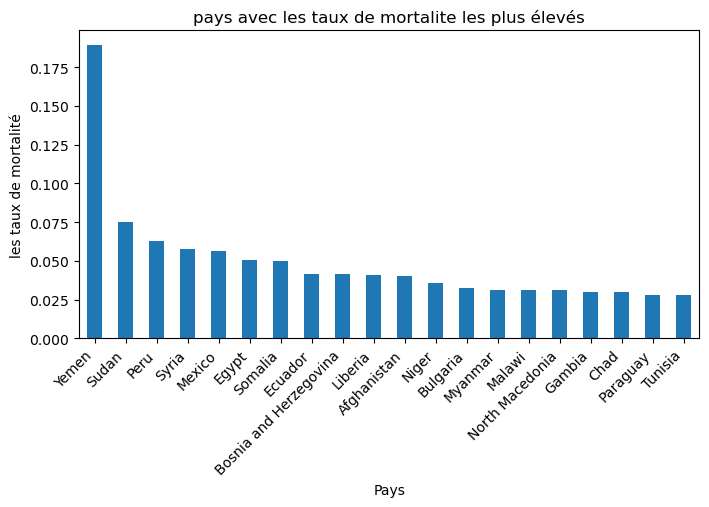

In [26]:
plt.figure(figsize=(8,4))
sorted_death=cov_loc.sort_values(by='taux_MRT',ascending=False).head(20)
ax = sorted_death['taux_MRT'].plot(kind='bar')
ax.set_xticklabels(sorted_death.index,rotation=45,ha="right")
ax.set_xlabel('Pays')
ax.set_ylabel('les taux de mortalité')
ax.set_title('pays avec les taux de mortalite les plus élevés')
plt.show()

Text(0, 0.5, 'number fo deaths')

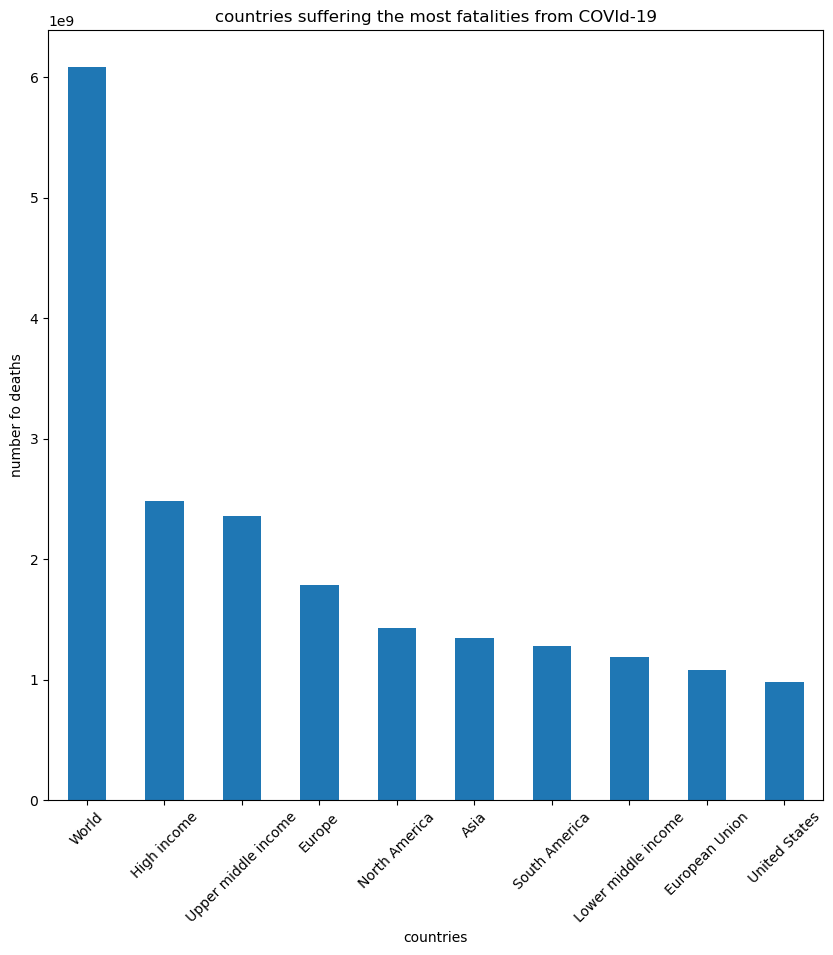

In [17]:
#SORTING THE NUMBER OF DEATHS IN THE DESCEDING ORDER
plt.figure(figsize=(10,10))
ax=cov_loc['total_deaths'].sort_values(ascending=False).head(10).plot(kind='bar')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_title("countries suffering the most fatalities from COVId-19")
ax.set_xlabel("countries")
ax.set_ylabel('number fo deaths')

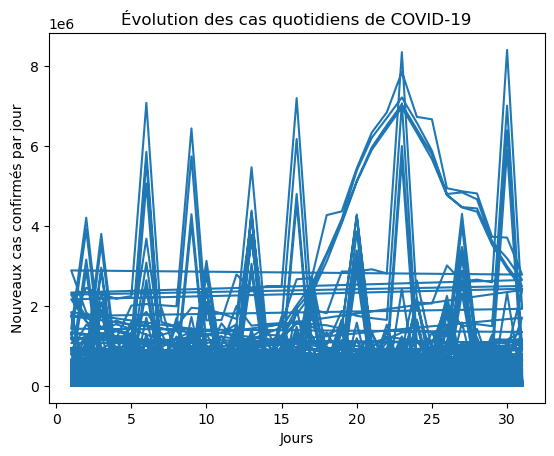

In [18]:
# Créer un graphique linéaire
plt.plot(cov_death['day'], cov_death['new_cases'])
plt.xlabel('Jours')
plt.ylabel('Nouveaux cas confirmés par jour')
plt.title('Évolution des cas quotidiens de COVID-19')
plt.show()

In [19]:
df_by_month = cov_death.groupby('month')[['new_cases','new_deaths']].sum()

Text(0, 0.5, 'Nombre de morts annee 2020')

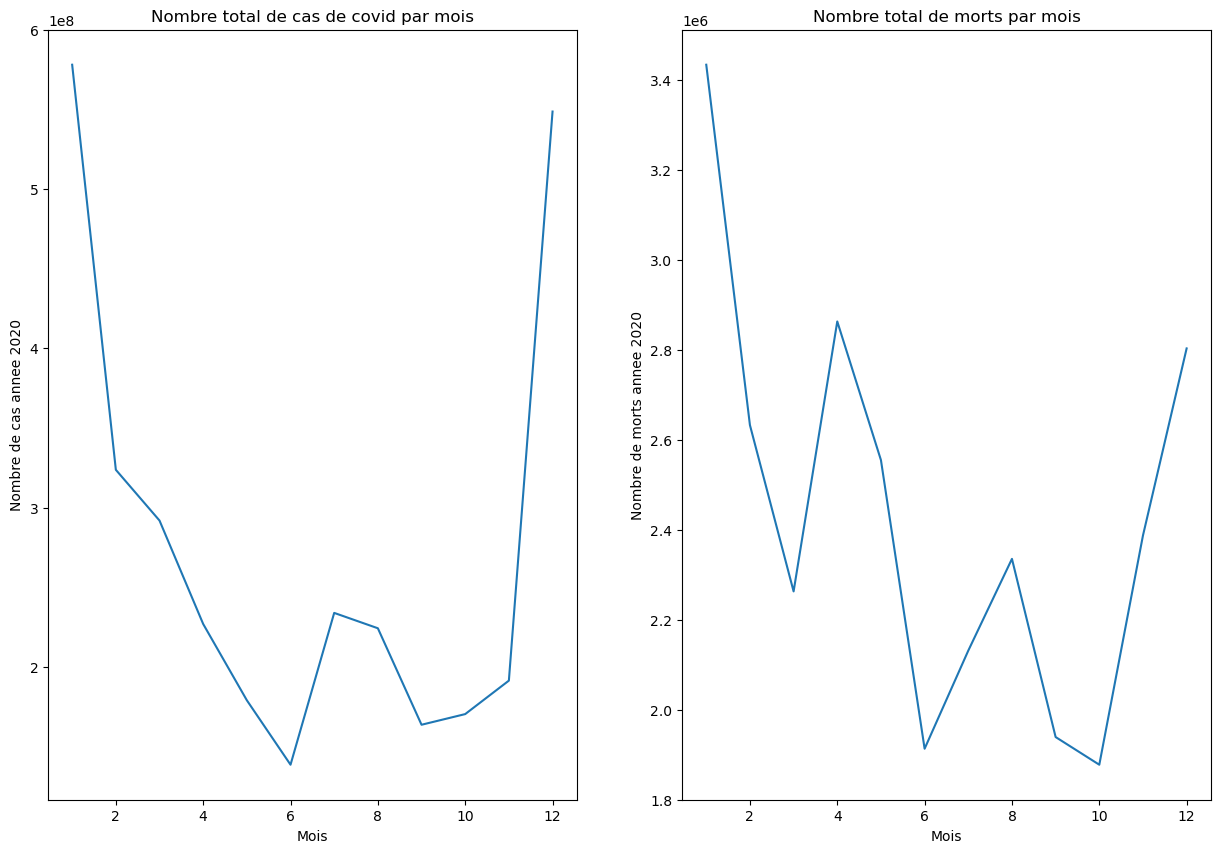

In [20]:
fig=plt.figure(figsize=(15,10))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

df_by_month['new_cases'].plot(kind='line',ax=ax1)
ax1.set_title("Nombre total de cas de covid par mois")
ax1.set_xlabel("Mois")
ax1.set_ylabel("Nombre de cas annee 2020")
df_by_month['new_deaths'].plot(kind='line',ax=ax2)
ax2.set_title("Nombre total de morts par mois")
ax2.set_xlabel("Mois")
ax2.set_ylabel("Nombre de morts annee 2020")

In [21]:
years=cov_death['year'].unique()

In [22]:
of_year=cov_death.groupby('year')['total_deaths'].sum()
of_year

year
2020    1.003175e+09
2021    5.962658e+09
2022    9.613113e+09
2023    8.847968e+09
Name: total_deaths, dtype: float64

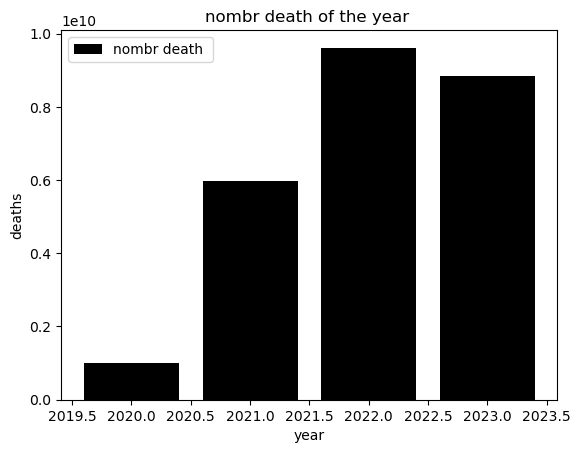

In [23]:
plt.bar(years,of_year,color='black',label=('nombr death '))
plt.xlabel('year')
plt.ylabel('deaths')
plt.title('nombr death of the year ')
plt.legend()
plt.show()

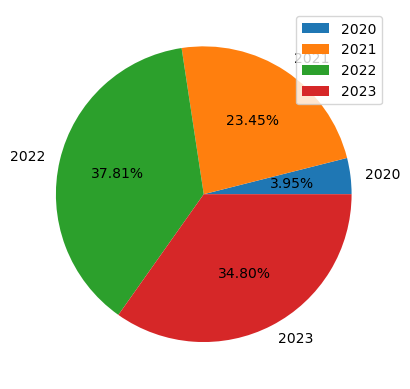

In [24]:
plt.pie(of_year,autopct='%2.2f%%',labels=years)
plt.legend()
plt.show()

In [25]:
from sklearn.preprocessing import StandardScaler
values_c = StandardScaler().fit_transform(cov_death)
#values_cr

ValueError: could not convert string to float: 'Asia'